In [3]:
import Pkg
using Optim
using PyPlot
using LinearAlgebra


Pkg.add("FFTW")

using FFTW

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [74]:
#https://stackoverflow.com/questions/56030394/how-to-visualize-fft-of-a-signal-in-julia

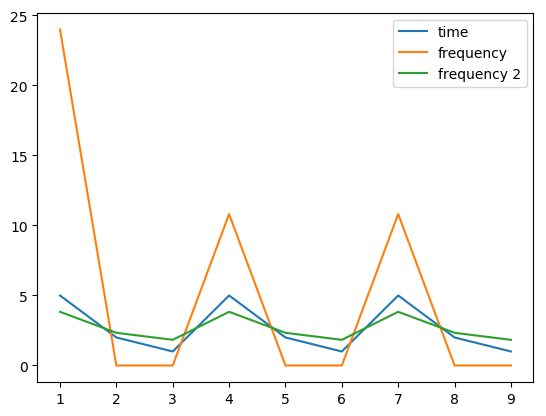

Complex{Float64}[24.0+0.0im, 0.0+0.0im, 0.0+0.0im, 10.5-2.59808im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im]
Complex{Float64}[3.83333-0.288675im, 2.33333+1.1547im, 1.83333-0.866025im, 3.83333-0.288675im, 2.33333+1.1547im, 1.83333-0.866025im, 3.83333-0.288675im, 2.33333+1.1547im, 1.83333-0.866025im]
24 23.999999999999996 + 0.0im


In [87]:
# Number of points 
N = 9
t = 1:N


# signal 
signal = repeat([5,2,1],3)

# Fourier Transform of it 
F = fft(signal)

# plots 
plot(collect(t), signal, label="time")
plot(collect(t), abs.(F),label="frequency")

inv = F[:]
inv[5:9] = zeros(5)
println(inv)
inv = ifft(inv)
println(inv)

plot(collect(t), inv,label="frequency 2")
legend()
show()

#ifft(F)

println(sum(signal)," ",sum(inv))

In [202]:
function lf(p,l)
    n = length(p)
    pt = fft(p)
    pt[(n-l+1):n] = zeros(l) #ignore high frequenies
    return abs.(ifft(pt))
end


lf([1,2,3,4,5],1)

5-element Array{Float64,1}:
 1.650335359177031 
 2.821289558916236 
 3.1182698404323475
 3.201791817521933 
 4.552318837444274 

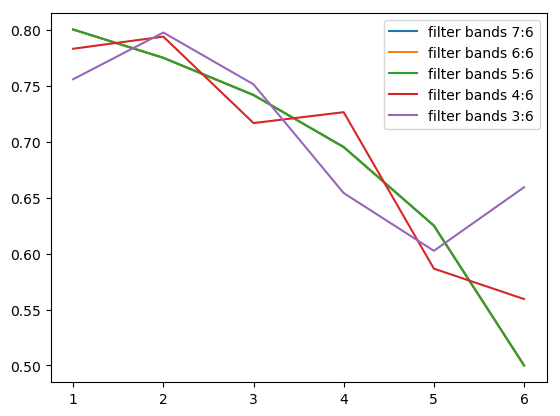

Complex{Float64}[4.13761+0.0im, 0.0592145-0.339202im, 0.174715-0.137108im, 0.196775+0.0im, 0.174715+0.137108im, 0.0592145+0.339202im] 4.802247970169583 + 0.0im
-----
Complex{Float64}[4.1375+0.0im, 0.0591845-0.339398im, 0.174662-0.136984im, 0.196972+0.0im, 0.174662+0.136984im, 0.0591845+0.339398im] 4.802165955147692 + 0.0im
-----
Complex{Float64}[4.13772+0.0im, 0.0592379-0.339271im, 0.174694-0.137019im, 0.196833+0.0im, 0.174694+0.137019im, 0.0592379+0.339271im] 4.802416919573909 + 0.0im
-----
Complex{Float64}[4.16635+0.0im, 0.0817841-0.31592im, 0.181284-0.090486im, 0.00660539+0.0im, 0.181284+0.090486im, 0.0817841+0.31592im] 4.699091429205475 + 0.0im
-----
Complex{Float64}[4.22094+0.0im, 0.153345-0.248708im, 0.00460036+0.0091285im, -0.00141001+0.0im, 0.00460036-0.0091285im, 0.153345+0.248708im] 4.535425792779558 + 0.0im
-----


In [203]:
function no_win(p,g)
    l = length(p)
    gs = reverse(g(p))
    result = ones(l)
    for i = 2:l
        for j=i:l
            result[i-1] = result[i-1]*gs[j]
        end
    end
    return reverse(result)
end

function create_obj(u,g)
    obj(p) = -1*u(p,g)
    return obj
end


function create_plot(n,l,u,g)
    p0 = .5*ones(n)
    for i=0:l
        obj(p) = create_obj(u,g)(p)
        obj_avg(p) = obj(lf(p,i))
        res = optimize(obj_avg,p0)
        ps = lf( res.minimizer, i )
        println(fft(ps), " ", sum(fft(ps)))
        println("-----")
        xs = collect( 1:length(ps) )
        plot(xs, ps, label="filter bands $(n-i+1):$(n)")
    end
    legend()
    show()
end

BETA = 1

f1(p) = clamp!(p,0, 1)
u1(p,g) = p.*(ones(size(p)) - g(p)).*no_win(p,g)
u2(p,g) = sum((BETA*ones(length(p))).^collect(1:length(p)) .*u1(p,g))

create_plot(6,4,u2,f1)